In [38]:
import numpy as np
import pandas as pd
import glob
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table
import itertools

In [18]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

vlt = EarthLocation.of_site('paranal')  # the easiest way... but requires internet

In [32]:
files_p112 = glob.glob('../data/P112_data/*.fits')
files_p113 = glob.glob('../data/P113_data/*.fits')


In [66]:
galah_ids_p112 = {
    1: 150107004201104,
    2: 151230003202196,
    4: 161013005401317,
    5: 161104004801189,
    6: 150829004301285,
    7: 160129003601260,
    13: 190212001601338,
    14: 140311007101261,
    23: 170514002101318,
    24: 171208003602294
}

In [ ]:
new_df = {'RG_id':[], 'galah_id': [], 'obj_name': []}

for k, v in obj_dir.items():
    result_table = Simbad.query_objectids(v['name'][0])
    result_table = np.array(result_table).astype('str')
    
    for i in result_table:
        if 'GALAH' in i: 
            galah_name = i.split(' ')[-1]

    new_df['RG_id'].append(k)
    new_df['galah_id'].append(int(galah_name))
    new_df['obj_name'].append(v['name'][0])
    
new_df = pd.DataFrame(new_df)
print(type(new_df))
print(type(galah))

new_df = pd.merge(new_df, galah[['sobject_id', 'vbroad', 'fe_h', 'Li_fe', 'ruwe_dr2']], left_on='galah_id', right_on='sobject_id')
new_df['Li_val'] = new_df.fe_h+new_df.Li_fe+1.05

cols = ['RG_id', 'galah_id', 'obj_name', 'Li_val', 'vbroad', 'fe_h','ruwe_dr2']
new_df.columns


print(new_df[cols].to_latex(index=False))

In [ ]:
galah_ids_p113 = {
    1: 
    2: ,
    3: ,
    4: ,
    5: ,
    6: ,
    7: ,
    8: ,
    9: ,
    10: ,
    11: ,
    12: ,
    13: ,
    14: ,
    15: ,
    16: ,
    17: ,
    18: ,
    19: ,
    20: ,
    21: ,
    22: , 
    23: ,
    24: ,
    25:
}

In [34]:
def get_dir(files):
    obj_dir = {}

    counts = []
    for i,file in enumerate(files):
        with fits.open(file) as hdul:
            hdul = fits.open(file)
            header  = hdul[0].header
            #print(header.cards['HIERARCH ESO QC CCF RV ERROR'])
            data    = hdul[1].data
            time    = header['HIERARCH ESO QC BJD']
            name    = header['OBJECT']
            obj     = int(header['HIERARCH ESO OBS NAME'].split('-')[0][2:])
            snr     = header['SNR']
            counts.append(obj)

            grade   = header['OB_GRADE'].replace(" ", "")  
            if grade =='C':
                print('RG',obj,header['OB_GRADE'])
                continue

            ra,dec  = header['RA'], header['DEC']
            obs_T   = header['DATE-OBS'].split('T')[0]
            rv_val  =  header['HIERARCH ESO QC CCF RV']#header['HIERARCH ESO OCS OBJ RV'] #km/s
            rv_err  = header['HIERARCH ESO QC CCF RV ERROR'] #km/s
            sc = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
            rv_corr = rv_val
            err_corr = rv_err

            if obj in obj_dir.keys():
                obj_dir[obj]['rv'].append(rv_corr)
                obj_dir[obj]['time'].append(time)
                obj_dir[obj]['err'].append(err_corr)
                obj_dir[obj]['name'].append(name)
                obj_dir[obj]['grade'].append(grade)
                obj_dir[obj]['snr'].append(snr)

            else:
                obj_dir[obj] = {'rv': [rv_corr], 'time': [time], 'err': [err_corr], 
                                'name': [name], 'grade': [grade], 'snr': [snr]}
    return obj_dir

obj_dir_p112 = get_dir(files_p112)
obj_dir_p113 = get_dir(files_p113)

RG 20 C
RG 13 C
RG 14 C
RG 1 C
RG 12 C
RG 6 C
RG 3 C
RG 11 C
RG 22 C
RG 15 C
RG 3 C
RG 8 C
RG 3 C
RG 25 C
RG 8 C
RG 22 C
RG 3 C
RG 7 C
RG 23 C


In [41]:
P112_snr = []
P113_snr = []

for k, v in obj_dir_p112.items():
    P112_snr.append(v['snr'])

for k, v in obj_dir_p113.items():
    P113_snr.append(v['snr'])
    
P112_snr = list(itertools.chain(*P112_snr))
P113_snr = list(itertools.chain(*P113_snr))

P112
30, 8-101, N=54
P113
24, 5-125, N=129


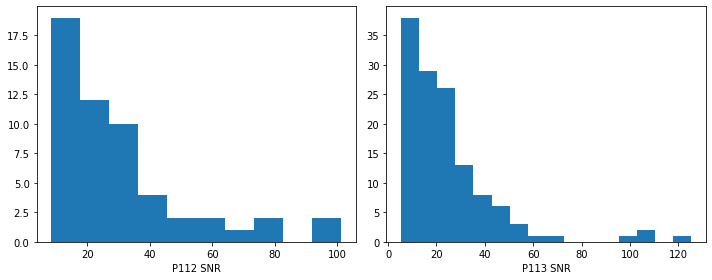

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(P112_snr,bins='auto')
plt.xlabel('P112 SNR')
plt.subplot(122)
plt.hist(P113_snr,bins='auto')
plt.xlabel('P113 SNR')
plt.tight_layout()


print('P112')
print('%i, %i-%i, N=%i'%(np.mean(P112_snr), np.min(P112_snr), np.max(P112_snr), len(P112_snr)))

print('P113')
print('%i, %i-%i, N=%i'%(np.mean(P113_snr), np.min(P113_snr), np.max(P113_snr), len(P113_snr)))

In [60]:
P112_err = []
P113_err = []

for k, v in obj_dir_p112.items():
    P112_err.append(np.array(v['err']))#/np.array(v['rv']))
    #print(np.array(v['err']),np.array(v['rv']))

print('\n')
for k, v in obj_dir_p113.items():
    P113_err.append(np.array(v['err']))#/np.array(v['rv']))
    #print(np.array(v['err']),np.array(v['rv']))
P112_err = list(itertools.chain(*P112_err))
P113_err = list(itertools.chain(*P113_err))

P112
0.022, 0.001-0.066, N=54
P113
0.040, 0.002-0.112, N=129


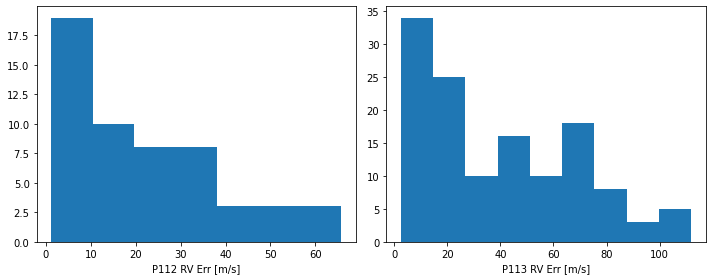

In [65]:

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist((P112_err*u.km/u.s).to(u.m/u.s).value,bins='auto')
plt.xlabel('P112 RV Err [m/s]')
plt.subplot(122)
plt.hist((P113_err*u.km/u.s).to(u.m/u.s).value,bins='auto')
plt.xlabel('P113 RV Err [m/s]')
plt.tight_layout()


print('P112')
print('%.3f, %.3f-%.3f, N=%i'%(np.mean(P112_err), np.min(P112_err), np.max(P112_err), len(P112_err)))

print('P113')
print('%.3f, %.3f-%.3f, N=%i'%(np.mean(P113_err), np.min(P113_err), np.max(P113_err), len(P113_err)))

In [28]:
count = 0
for k, v in obj_dir.items():
    if len(v['rv']) >= 4:
        print(k,v['rv'])
        count+=1
count

24 [41.4434063272337, 41.1749235709183, 41.2081551074251, 41.1542207332849, 41.395348072696]
2 [32.3479397396596, 32.2219401343109, 32.1287798102999, 32.4346525203479, 32.2407984317867]
5 [100.525659487395, 99.3956402889891, 100.556353964083, 99.7853902050356, 99.9303178358284]
13 [33.5383857423073, 36.2660448605177, 36.5492320532925, 17.1509962485035, 37.7047509552192]
1 [53.7010931002614, 53.7985038354756, 53.7157728358864, 53.4587722172283]
4 [50.1334256209368, 49.643055167163, 49.6464491891169, 49.6942516154447]
7 [3.11909891220514, 3.08054001727914, 2.88418408528451, 3.56078024101949, 3.51801703289918]


7

In [15]:
for i in list(set(counts)):
    if counts.count(i) >= 5: 
        print(i,counts.count(i))

1 5
2 5
5 5
7 5
13 6
24 5
